## Malaria Parasite Detection Using CNN

Watch Full Video Here: https://youtu.be/Jdagdil0FIw


![alt text](https://ourworldindata.org/uploads/2019/04/Previous-prevalence-of-malaria-world-map.png)

Malaria is an infectious disease that causes over 400,000 deaths per year.

Mosquitoes are notorious for carrying malaria

In 2018, Rajaraman et al. published a paper entitled Pre-trained convolutional neural networks as feature extractors toward improved parasite detection in thin blood smear images.

Link: https://lhncbc.nlm.nih.gov/publication/pub9932

Paper Link: https://lhncbc.nlm.nih.gov/system/files/pub9752.pdf

![alt text](https://www.pyimagesearch.com/wp-content/uploads/2018/12/dl_medical_imaging_malaria_dataset.jpg)

In [58]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.17.0


In [59]:
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard,ReduceLROnPlateau,ModelCheckpoint

In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
img_width = 64
img_height = 64

In [62]:
datagen=ImageDataGenerator(rescale=1./255,validation_split=0.25)

In [63]:
train_generator=datagen.flow_from_directory(directory=r"malaria-dataset",
                                            target_size=(img_width,img_height),
                                            batch_size=16,
                                            class_mode="binary",
                                            subset="training")
validation_generator=datagen.flow_from_directory(directory=r"malaria-dataset",
                                                 target_size=(img_width,img_height),
                                                 batch_size=16,
                                                 class_mode="binary",
                                                 subset="validation")

Found 20670 images belonging to 2 classes.
Found 6888 images belonging to 2 classes.


In [64]:
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, img_width, img_height, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.float32)
    )
).repeat() 

In [65]:
validation_dataset = tf.data.Dataset.from_generator(
    lambda: validation_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, img_width, img_height, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.float32)
    )
).repeat()

In [66]:
train_generator.labels

array([0, 0, 0, ..., 1, 1, 1])

## CNN Model Building

In [82]:
input_shape=(img_width,img_height,3)
def malaria_model(input_shape):
    model=Sequential([
        Conv2D(16,(3,3), input_shape = (img_width, img_height, 3), activation='elu'),
        MaxPool2D(2,2),
        Dropout(0.2),

        Conv2D(32, (3,3), activation='elu'),
        MaxPool2D(2,2),
        Dropout(0.3),

        Conv2D(64, (3,3), activation='elu'),
        MaxPool2D(2,2),
        Dropout(0.4),

        Conv2D(128, (3,3), activation='elu'),
        MaxPool2D(2,2),
        Dropout(0.5),

        Flatten(),

        Dense(128, activation='elu'),
        Dropout(0.4),

        Dense(1, activation='sigmoid')])

    model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["acc"])
    return model

In [83]:
model=malaria_model(input_shape)

In [84]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163,233 (637.63 KB)

 Trainable params: 163,233 (637.63 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
earlystop = EarlyStopping(
    monitor="val_loss", 
    patience=3, 
    restore_best_weights=True)
reducelr = ReduceLROnPlateau(
    monitor="val_loss", 
    factor=0.1, 
    patience=2, 
    min_lr=1e-6, 
    verbose=1)
checkpoint = ModelCheckpoint(
    filepath="best_model.keras",   
    monitor="val_loss",        
    save_best_only=True,       
    mode="min")
tensorboard = TensorBoard(
    log_dir="./logs",      
    histogram_freq=1,         
    write_graph=True,      
    write_images=True,     
    update_freq="epoch"    
)


In [86]:
history=model.fit(
    train_dataset,
    steps_per_epoch=len(train_generator),
    validation_data=validation_dataset,
    validation_steps=len(validation_generator),
    epochs=8,callbacks=[reducelr,checkpoint,tensorboard,earlystop]
)


Epoch 1/8
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 47s 33ms/step - acc: 0.6560 - loss: 0.5993 - val_acc: 0.9370 - val_loss: 0.1833 - learning_rate: 0.0010
Epoch 2/8
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - acc: 0.9289 - loss: 0.2154 - val_acc: 0.9518 - val_loss: 0.1483 - learning_rate: 0.0010
Epoch 3/8
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 44s 34ms/step - acc: 0.9436 - loss: 0.1806 - val_acc: 0.9474 - val_loss: 0.1536 - learning_rate: 0.0010
Epoch 4/8
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 45s 35ms/step - acc: 0.9478 - loss: 0.1697 - val_acc: 0.9521 - val_loss: 0.1439 - learning_rate: 0.0010
Epoch 5/8
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 45s 35ms/step - acc: 0.9505 - loss: 0.1645 - val_acc: 0.9511 - val_loss: 0.1355 - learning_rate: 0.0010
Epoch 6/8
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 44s 34ms/step - acc: 0.9510 - loss: 0.1600 - val_acc: 0.9551 - val_loss: 0.1384 - learning_rate: 0.0010
Epoch 7/8
1291/1292 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - acc: 0.9522 - loss: 0.1559
Epoch 7: ReduceLROnPlateau reducing learning ra

In [87]:
history.history

{'acc': [0.7856313586235046,
  0.9342525601387024,
  0.94499272108078,
  0.9480406641960144,
  0.9496371746063232,
  0.9498306512832642,
  0.9500241875648499,
  0.9558780789375305],
 'loss': [0.42958831787109375,
  0.20161019265651703,
  0.17558380961418152,
  0.17241832613945007,
  0.1635366678237915,
  0.16313643753528595,
  0.1633707880973816,
  0.1415427178144455],
 'val_acc': [0.9369918704032898,
  0.9518002271652222,
  0.9474448561668396,
  0.9520906209945679,
  0.9510743618011475,
  0.9551393985748291,
  0.9528164863586426,
  0.953832745552063],
 'val_loss': [0.18334627151489258,
  0.1482711285352707,
  0.15358638763427734,
  0.14391352236270905,
  0.135454460978508,
  0.1384330838918686,
  0.1458590179681778,
  0.13282565772533417],
 'learning_rate': [0.0010000000474974513,
  0.0010000000474974513,
  0.0010000000474974513,
  0.0010000000474974513,
  0.0010000000474974513,
  0.0010000000474974513,
  0.0010000000474974513,
  0.00010000000474974513]}

In [90]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['acc'])
  plt.plot(epoch_range, history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

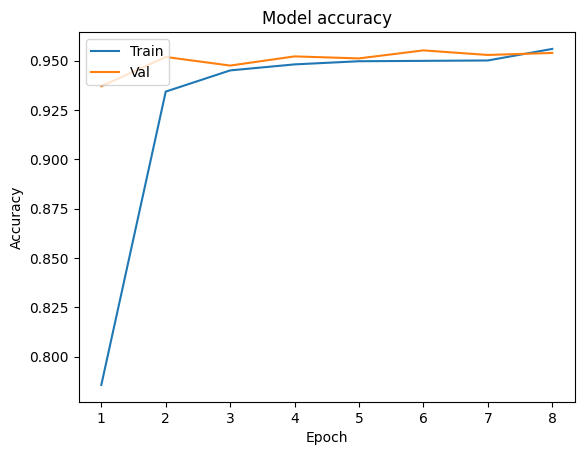

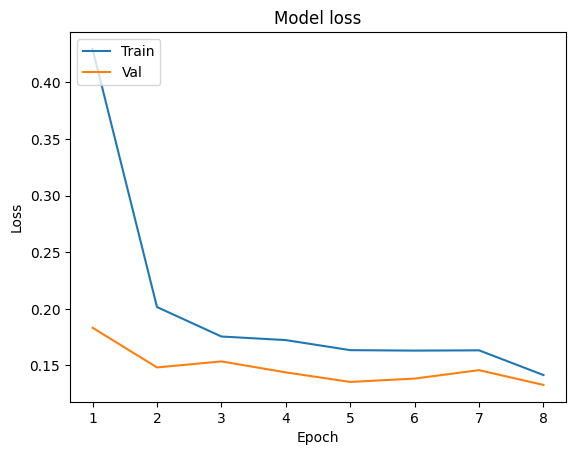

In [91]:
plot_learningCurve(history, 8)